pick locations and plot timeseries, model v obs, and climatologies

start with:
TAO 140W
Papa
La Parguera
CCE2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Tools import panfxns as pf, commonfxns as cf, OAPBuoyData as OAP, mplRC, OAPBuoyComp as bc, viz
import netCDF4 as nc
import xarray as xr
import glob
import cftime
import cmocean
import datetime as dt

rc=mplRC.paperRC2()
%matplotlib inline

hostname: an102


In [2]:
OAP.localPath

'/work/Elise.Olson/obs/OAPBuoys/'

In [3]:
#saveloc='/home/Elise.Olson/OAPMSE/posterFigs/'

In [4]:
dfTable=pd.read_csv('/home/ebo/OAPMSE/analysis/notebooks/Eval/updated/table.csv',index_col=0)

In [5]:
dfTable

,datasetID,shortTitle,Lat,Lon,tos_N,tos_N2,tos_ofit,tos_mfit,sos_N,sos_N2,...,chlos_mfit,o2os_N,o2os_N2,o2os_ofit,o2os_mfit,phosC_N,phosC_N2,phosC_ofit,phosC_mfit,AlkFit
0,pmel_co2_moorings_ba50_a09b_5565,Iceland,68.000,-12.6700,805.0,805.0,False,True,805.0,805.0,...,True,796.0,796.0,False,True,803.0,803.0,False,True,Lee
1,pmel_co2_moorings_c2e7_ecb9_4565,Gulf of Maine,43.023,-70.5420,3749.0,3749.0,True,True,4141.0,4141.0,...,True,2647.0,2647.0,True,True,3727.0,3727.0,True,True,Hunt
2,pmel_co2_moorings_c64b_e2bb_dc32,First Landing,36.998,-76.0880,695.0,695.0,False,True,695.0,695.0,...,True,282.0,282.0,False,True,0.0,0.0,False,False,None
3,pmel_co2_moorings_4e4c_1834_1204,Hog Reef,32.460,-64.8300,1829.0,1829.0,True,True,1821.0,1821.0,...,False,0.0,0.0,False,False,0.0,0.0,False,False,None
4,pmel_co2_moorings_e1ef_470f_1fee,Crescent Reef,32.400,-64.7900,1321.0,1321.0,True,True,1321.0,1321.0,...,False,0.0,0.0,False,False,0.0,0.0,False,False,None
5,pmel_co2_moorings_939b_fc25_57be,BTM,31.500,-64.2000,690.0,690.0,False,True,688.0,688.0,...,False,0.0,0.0,False,False,688.0,688.0,False,True,Lee
6,pmel_co2_moorings_ab27_2faf_3aa1,Gray's Reef,31.400,-80.8700,2893.0,2893.0,True,True,2762.0,2762.0,...,True,1327.0,1327.0,True,True,2601.0,2601.0,True,True,Xue
7,pmel_co2_moorings_cf08_f32f_712a,Coastal MS,30.000,-88.6000,1296.0,1296.0,True,True,1295.0,1295.0,...,False,0.0,0.0,False,False,1293.0,1293.0,True,True,Lee
8,pmel_co2_moorings_0af7_8b89_77bd,Coastal LA,28.520,-90.2878,633.0,633.0,False,True,633.0,633.0,...,True,567.0,567.0,False,True,626.0,626.0,False,True,Lee
9,pmel_co2_moorings_045c_c8bc_b1c6,Cheeca Rocks,24.910,-80.6240,1810.0,1810.0,True,True,1808.0,1808.0,...,True,1258.0,1258.0,True,True,0.0,0.0,False,False,None


In [6]:
dfInfoBuoy=OAP.loadOAPInfo(modelgrid=True)
dfInfoBuoy

,datasetID,title,minTime,maxTime,Lat,Lon,tabfile,jj,ii,Lat1x1,Lon1x1,jj288,ii288,jjHD,iiHD,modBathy,modBathyHD,shortTitle
0,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.000,-12.6700,ICELAND.txt,158,347,68.496124,-12.499858,158,278,474,574,1842.041138,1824.660645,Iceland
1,pmel_co2_moorings_c2e7_ecb9_4565,Gulf of Maine NOAA Surface Ocean CO2 and Ocean...,2006-07-13T02:16:00Z,2021-06-02T09:17:00Z,43.023,-70.5420,GULFOFMAINE.txt,133,289,43.492496,-70.500000,133,231,381,459,58.502533,58.015274,Gulf of Maine
2,pmel_co2_moorings_c64b_e2bb_dc32,First Landing NOAA Surface Ocean CO2 and Ocean...,2018-04-05T21:17:00Z,2020-09-26T15:17:00Z,36.998,-76.0880,FIRSTLANDING.txt,127,283,37.499783,-76.500000,127,226,366,447,10.000000,10.000000,First Landing
3,pmel_co2_moorings_4e4c_1834_1204,Hog Reef NOAA Surface Ocean CO2 and Ocean Acid...,2010-12-05T03:17:00Z,2018-07-31T12:16:00Z,32.460,-64.8300,HOGREEF.txt,122,295,32.479385,-64.500000,122,236,353,470,3284.619141,921.604980,Hog Reef
4,pmel_co2_moorings_e1ef_470f_1fee,Crescent Reef NOAA Surface Ocean CO2 and Ocean...,2010-11-27T03:17:00Z,2015-07-07T15:17:00Z,32.400,-64.7900,CRESCENTREEF.txt,122,295,32.479385,-64.500000,122,236,353,470,3284.619141,921.604980,Crescent Reef
5,pmel_co2_moorings_939b_fc25_57be,BTM NOAA Surface Ocean CO2 and Ocean Acidifica...,2005-10-22T00:16:00Z,2007-10-01T12:16:00Z,31.500,-64.2000,BTM.txt,121,295,31.502697,-64.500000,121,236,351,470,4359.846191,4452.479004,BTM
6,pmel_co2_moorings_ab27_2faf_3aa1,Gray's Reef NOAA Surface Ocean CO2 and Ocean A...,2006-07-18T00:45:00Z,2018-08-27T12:17:00Z,31.400,-80.8700,GRAYSREEF.txt,121,279,31.502697,-80.500000,121,223,351,438,24.676357,18.283102,Gray's Reef
7,pmel_co2_moorings_cf08_f32f_712a,Coastal MS NOAA Surface Ocean CO2 and Ocean Ac...,2009-05-12T18:17:00Z,2017-05-29T21:17:00Z,30.000,-88.6000,COASTALMS.txt,120,271,30.512562,-88.500000,120,217,348,422,10.232224,9.500000,Coastal MS
8,pmel_co2_moorings_0af7_8b89_77bd,Coastal LA NOAA Surface Ocean CO2 and Ocean Ac...,2017-07-14T18:46:00Z,2020-08-12T21:17:00Z,28.520,-90.2878,COASTALLA.txt,118,269,28.499218,-90.500000,118,215,344,418,108.902542,33.752552,Coastal LA
9,pmel_co2_moorings_045c_c8bc_b1c6,Cheeca Rocks NOAA Surface Ocean CO2 and Ocean ...,2011-12-08T21:17:00Z,2017-09-09T09:17:00Z,24.910,-80.6240,CHEECAROCKS.txt,114,279,24.508146,-80.500000,114,223,335,438,574.317078,208.579956,Cheeca Rocks


In [7]:
checklist=['tos_ofit','sos_ofit','spco2_ofit',
     'phos_ofit','chlos_ofit','o2os_ofit','phosC_ofit']

iii=dfTable.Lat!=dfTable.Lat
for col in checklist:
    iii=iii|(dfTable[col]==True)
dslist=list(np.squeeze(dfTable.loc[iii,['datasetID']].values))
    
dfInfoBuoy2=dfInfoBuoy.loc[dfInfoBuoy.datasetID.isin(dslist)]

In [8]:
dfInfoBuoy2

,datasetID,title,minTime,maxTime,Lat,Lon,tabfile,jj,ii,Lat1x1,Lon1x1,jj288,ii288,jjHD,iiHD,modBathy,modBathyHD,shortTitle
1,pmel_co2_moorings_c2e7_ecb9_4565,Gulf of Maine NOAA Surface Ocean CO2 and Ocean...,2006-07-13T02:16:00Z,2021-06-02T09:17:00Z,43.023,-70.542,GULFOFMAINE.txt,133,289,43.492496,-70.5,133,231,381,459,58.502533,58.015274,Gulf of Maine
3,pmel_co2_moorings_4e4c_1834_1204,Hog Reef NOAA Surface Ocean CO2 and Ocean Acid...,2010-12-05T03:17:00Z,2018-07-31T12:16:00Z,32.460,-64.830,HOGREEF.txt,122,295,32.479385,-64.5,122,236,353,470,3284.619141,921.604980,Hog Reef
4,pmel_co2_moorings_e1ef_470f_1fee,Crescent Reef NOAA Surface Ocean CO2 and Ocean...,2010-11-27T03:17:00Z,2015-07-07T15:17:00Z,32.400,-64.790,CRESCENTREEF.txt,122,295,32.479385,-64.5,122,236,353,470,3284.619141,921.604980,Crescent Reef
6,pmel_co2_moorings_ab27_2faf_3aa1,Gray's Reef NOAA Surface Ocean CO2 and Ocean A...,2006-07-18T00:45:00Z,2018-08-27T12:17:00Z,31.400,-80.870,GRAYSREEF.txt,121,279,31.502697,-80.5,121,223,351,438,24.676357,18.283102,Gray's Reef
7,pmel_co2_moorings_cf08_f32f_712a,Coastal MS NOAA Surface Ocean CO2 and Ocean Ac...,2009-05-12T18:17:00Z,2017-05-29T21:17:00Z,30.000,-88.600,COASTALMS.txt,120,271,30.512562,-88.5,120,217,348,422,10.232224,9.500000,Coastal MS
9,pmel_co2_moorings_045c_c8bc_b1c6,Cheeca Rocks NOAA Surface Ocean CO2 and Ocean ...,2011-12-08T21:17:00Z,2017-09-09T09:17:00Z,24.910,-80.624,CHEECAROCKS.txt,114,279,24.508146,-80.5,114,223,335,438,574.317078,208.579956,Cheeca Rocks
10,pmel_co2_moorings_3b97_8e9a_3b51,Stratus NOAA Surface Ocean CO2 and Ocean Acidi...,2006-10-16T21:00:00Z,2018-08-17T21:17:00Z,-19.700,-85.600,STRATUS.txt,70,274,-19.484362,-85.5,70,219,203,428,4416.832031,4428.059570,Stratus
11,pmel_co2_moorings_ab03_dbac_935b,La Parguera NOAA Surface Ocean CO2 and Ocean A...,2009-01-16T21:17:00Z,2019-09-06T09:17:00Z,17.954,-67.051,LAPARGUERA.txt,107,292,17.494673,-67.5,107,234,318,465,3365.159180,4601.034668,La Parguera
13,pmel_co2_moorings_cb2d_135a_c444,CCE1 NOAA Surface Ocean CO2 and Ocean Acidific...,2008-11-11T01:29:00Z,2020-06-11T09:16:00Z,33.480,-122.510,CCE1.txt,123,237,33.518242,-122.5,123,190,356,354,4104.415527,4175.210449,CCE1
14,pmel_co2_moorings_9675_b3d3_c1c1,CCE2 NOAA Surface Ocean CO2 and Ocean Acidific...,2010-01-17T00:28:00Z,2021-06-16T21:17:00Z,34.324,-120.814,CCE2.txt,124,239,34.491901,-120.5,124,191,358,359,359.950104,36.263607,CCE2


In [9]:
fstatic1x1='/work/Elise.Olson/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_historical_D1/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_daily_1x1deg/ocean_daily_1x1deg.static.nc'
with nc.Dataset(fstatic1x1) as fstat:
    glon=fstat.variables['geolon'][:]
    glat=fstat.variables['geolat'][:]
    deptho=fstat.variables['deptho'][:]
    wet=fstat.variables['wet'][:]

In [10]:
class labelInf:
    def __init__(self,a,b):
        offset=(a,b)
        self.offset=offset
        ang=np.arctan2(offset[1],offset[0])*180/np.pi
        if (ang>=-88) & (ang<=88):
            self.relpos=[0,.5]
            self.ha='left'
            self.va='center'
        elif (ang<=-92) | (ang>=92):
            self.relpos=[1,.5]
            self.ha='right'
            self.va='center'
        else:
            raise Error('not implemented')

In [11]:
ld={'Gulf of Maine':labelInf(4,15), 
            'Hog Reef':labelInf(10,10), 
            'Crescent Reef':labelInf(-5,7), 
            "Gray's Reef":labelInf(9,-5),
       'Coastal MS':labelInf(-5,-10), 
            'Cheeca Rocks':labelInf(15,-4), 
            'Stratus':labelInf(10,10), 
            'La Parguera':labelInf(3,-15), 
            'CCE1':labelInf(-10,5),
       'CCE2':labelInf(4,15), 
            'Cape Elizabeth':labelInf(10,10), 
            'Cha ba':labelInf(-10,-5), 
            'GAKOA':labelInf(10,2), 
            'Kodiak':labelInf(-15,1), 
            'Papa':labelInf(-15,0),
       'SOFS':labelInf(12,5), 
            'KEO':labelInf(-10,5), 
            'MOSEAN/WHOTS':labelInf(-3,17), 
            'Kaneohe':labelInf(10,8), 
            'CRIMP2':labelInf(10,-8), 
           'Ala Wai':labelInf(-10,-8), 
            'Kilo Nalu':labelInf(-17,5),
            'TAO170W':labelInf(-6,10), 
            'TAO165E':labelInf(-10,0), 
            'TAO8S165E':labelInf(5,-15), 
            'TAO155W':labelInf(6,-20), 
            'Chuuk':labelInf(-8,10),
           'TAO140W':labelInf(10,10), 
            'TAO125W':labelInf(8,-12), 
            'TAO110W':labelInf(10,0)
           }

In [12]:
def nmfmt(str1):
    if str1=='Cha ba':
        return '\u0106h\u00E1\u0294ba\u00B7'
    else:
        return str1

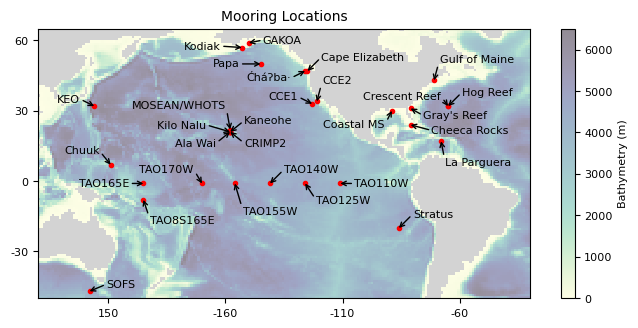

In [25]:
fig,ax=plt.subplots(1,1,figsize=(8,3.5))
v0=0; v1=6500
cmap=cmocean.cm.deep
cmap.set_bad('darkgray')
m=ax.pcolormesh(deptho,shading='auto',vmin=v0,vmax=v1,cmap=cmap,alpha=.5)
ax.set_title('Mooring Locations',fontsize=10)
cb=fig.colorbar(m,label='Bathymetry (m)')
ax.set_aspect(1)
#lstr={'TAO140':'TAO 140W','Papa':'OS Papa','La Parg':'La Parguera'}
for jj,ii,st in dfInfoBuoy2.loc[:,['jj','ii','shortTitle']].values:
    #jj,ii=cf.nearest_point(lat,lon,glat,glon,thresh=80) 
    ax.plot(ii,jj,'ro',ms=3)
    ax.annotate(nmfmt(st),(ii,jj),xytext=ld[st].offset,textcoords='offset points',
                arrowprops=dict(arrowstyle="->", shrinkA=0,shrinkB=0,relpos=ld[st].relpos),
                ha=ld[st].ha,va=ld[st].va)
# for loc in ['TAO140','Papa','La Parg']:
#     idf=dfInfoBuoy.loc[dfInfoBuoy.title.str.startswith(loc)]
#     lat=idf.Lat.values
#     lon=idf.Lon.values
#     jj,ii=cf.nearest_point(lat,lon,glat,glon,thresh=80) 
#     ax.plot(ii,jj,'r*',ms=20)
#     if loc=='Papa':
#         ax.text(ii-31,jj-10,lstr[loc],color='w',weight='bold',fontsize=16)
#     elif loc=='TAO140':
#         ax.text(ii-2,jj-15,lstr[loc],color='w',weight='bold',fontsize=16)
#     else:
#         ax.text(ii+2,jj+5,lstr[loc],color='w',weight='bold',fontsize=16)
ax.axis([120,330,40,155])
ax.set_xticks([150,200,250,300])
ax.xaxis.set_ticklabels([150,200-360,250-360,300-360])
ax.set_yticks([60,90,120,150])
ax.yaxis.set_ticklabels([60-90,90-90,120-90,150-90])

#fig.savefig(saveloc+'map.pdf',dpi=400,bbox_inches='tight')
#fig.savefig(saveloc+'map.png',dpi=400,bbox_inches='tight')
fig.savefig('/work/ebo/calcs/evalFigs/map/map1deg_Rev.pdf',dpi=300,bbox_inches='tight')
fig.savefig('/work/ebo/calcs/evalFigs/map/map1deg_Rev.tif',dpi=300,bbox_inches='tight')

In [14]:
dfInfoBuoy2.loc[:,['shortTitle','ii','jj']].sort_values('jj')

,shortTitle,ii,jj
24,SOFS,142,43
10,Stratus,274,70
35,TAO8S165E,165,82
40,TAO110W,249,89
39,TAO125W,234,89
36,TAO155W,204,89
33,TAO170W,190,89
38,TAO140W,219,89
34,TAO165E,165,89
37,Chuuk,151,97


21.28 -157.85
21.458 -157.798
21.48 -157.78
21.288 -157.865
22.67 -157.98


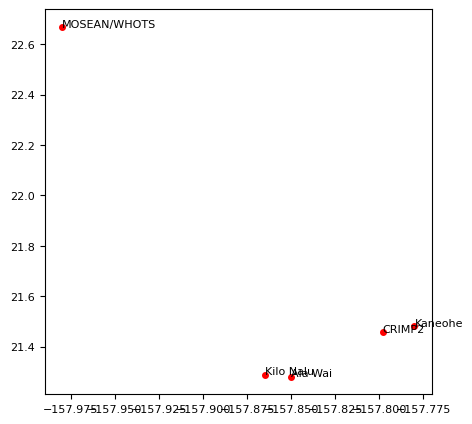

In [15]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
for v in ['Ala Wai','CRIMP2','Kaneohe','Kilo Nalu','MOSEAN/WHOTS']:
    lat,lon=dfInfoBuoy.loc[dfInfoBuoy.shortTitle==v,['Lat','Lon']].values[0]
    print(lat,lon)
    plt.plot(lon,lat,'r.')
    plt.text(lon,lat,v)

32.4 -64.79
32.46 -64.83


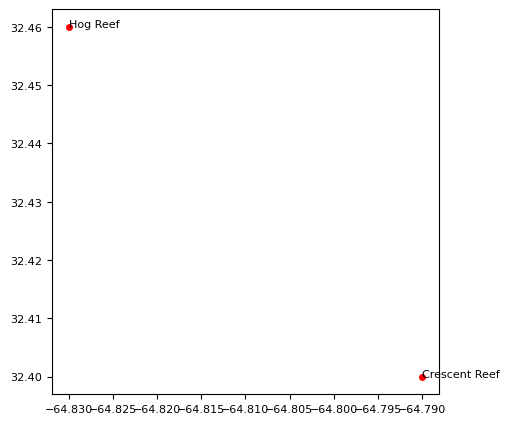

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
for v in ['Crescent Reef','Hog Reef']:
    lat,lon=dfInfoBuoy.loc[dfInfoBuoy.shortTitle==v,['Lat','Lon']].values[0]
    print(lat,lon)
    plt.plot(lon,lat,'r.')
    plt.text(lon,lat,v)

In [17]:
# confirm locations of 
lat2d=np.where(glat.mask==False,glat,np.expand_dims(viz.latvec1x1,1)*np.ones(np.shape(glat)))
lon2d=np.where(glon.mask==False,glon,np.expand_dims(viz.lonvec1x1,0)*np.ones(np.shape(glon)))

In [18]:
dfInfoBuoy.loc[dfInfoBuoy.title.str.contains('First Landing'),['Lon','Lat']].values[0]

array([-76.088,  36.998])

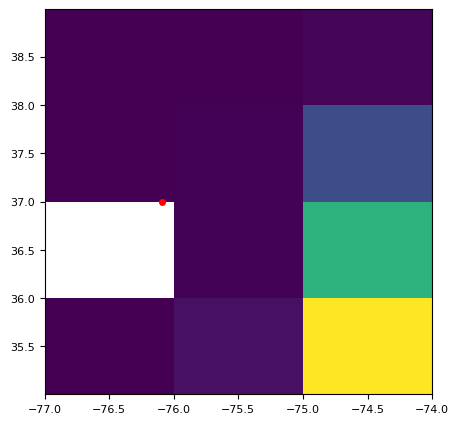

In [19]:
lon,lat=dfInfoBuoy.loc[dfInfoBuoy.title.str.contains('First Landing'),['Lon','Lat']].values[0]
fig,ax=plt.subplots(1,1,figsize=(5,5))
#ax.pcolormesh(lon2d[100:160,150:260],lat2d[100:160,150:260],deptho[100:160,150:260])
ax.pcolormesh(lon2d[125:129,283:286],lat2d[125:129,283:286],deptho[125:129,283:286])
#ax.set_xlim(-300,60)
ax.plot(lon,lat,'r.')

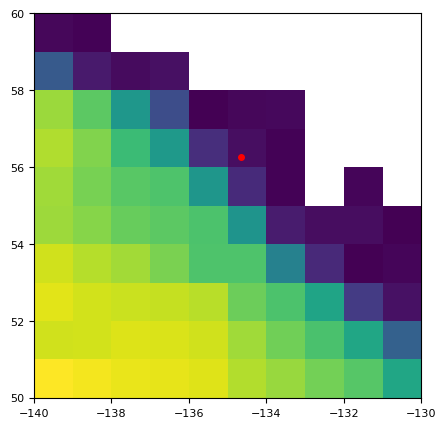

In [20]:
lon,lat=dfInfoBuoy.loc[dfInfoBuoy.title.str.contains('SEAK'),['Lon','Lat']].values[0]
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.pcolormesh(lon2d[140:150,220:230],lat2d[140:150,220:230],deptho[140:150,220:230])
#ax.set_xlim(-300,60)
ax.plot(lon,lat,'r.')

In [21]:
dfInfoBuoy.loc[dfInfoBuoy.title.str.contains('SEAK')]

,datasetID,title,minTime,maxTime,Lat,Lon,tabfile,jj,ii,Lat1x1,Lon1x1,jj288,ii288,jjHD,iiHD,modBathy,modBathyHD,shortTitle
19,pmel_co2_moorings_fa67_c709_71e7,SEAK NOAA Surface Ocean CO2 and Ocean Acidific...,2013-03-29T03:18:00Z,2016-02-03T18:17:00Z,56.26,-134.67,SEAK.txt,146,225,56.500702,-134.5,146,180,422,331,168.998688,150.0,SEAK


In [22]:
glon

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [0.5177028775215149, 1.4442238807678223, 2.476839303970337, ...,
         -2.5038156509399414, -1.5278314352035522, -0.5473382472991943],
        [0.3541676104068756, 1.4481176137924194, 2.4995288848876953, ...,
         -2.5235347747802734, -1.5386459827423096, -0.6105579733848572],
        [0.4662967622280121, 1.4348024129867554, 2.3575472831726074, ...,
         -2.5970911979675293, -1.5038855075836182, -0.5132659077644348]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [23]:
glat

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [87.46478271484375, 87.46769714355469, 87.46829223632812, ...,
         87.46687316894531, 87.4662094116211, 87.46649932861328],
        [88.44621276855469, 88.44581604003906, 88.447021484375, ...,
         88.44247436523438, 88.44267272949219, 88.44477081298828],
        [89.34001922607422, 89.3426513671875, 89.344482421875, ...,
         89.33466339111328, 89.33531951904297, 89.33757781982422]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [24]:
glat.data

array([[1.0000000e+20, 1.0000000e+20, 1.0000000e+20, ..., 1.0000000e+20,
        1.0000000e+20, 1.0000000e+20],
       [1.0000000e+20, 1.0000000e+20, 1.0000000e+20, ..., 1.0000000e+20,
        1.0000000e+20, 1.0000000e+20],
       [1.0000000e+20, 1.0000000e+20, 1.0000000e+20, ..., 1.0000000e+20,
        1.0000000e+20, 1.0000000e+20],
       ...,
       [8.7464783e+01, 8.7467697e+01, 8.7468292e+01, ..., 8.7466873e+01,
        8.7466209e+01, 8.7466499e+01],
       [8.8446213e+01, 8.8445816e+01, 8.8447021e+01, ..., 8.8442474e+01,
        8.8442673e+01, 8.8444771e+01],
       [8.9340019e+01, 8.9342651e+01, 8.9344482e+01, ..., 8.9334663e+01,
        8.9335320e+01, 8.9337578e+01]], dtype=float32)